# Noise

In [117]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg

In [8]:
import pandas as pd

df = pd.read_csv("CCR_final.csv")
# df

In [9]:
df_filtered = df[df['CCR_ID'] == './CCR-05/2014/20140320.txt']
df_filtered
df = df_filtered

In [10]:
df = df.drop(['CCR_ID'], axis=1)
# df
# df.to_csv('CCR_edited.csv')

In [121]:
import pandas as pd
import numpy as np

def add_noise_to_time_series(time_series, noise_level):
    noise = np.random.normal(scale=noise_level, size=time_series.shape)
    noisy_time_series = time_series + noise
    return noisy_time_series

noise_level = 4  # Adjust the noise level according to your needs

# Convert DataFrame to NumPy array
temp = df
temp = temp.drop('Timestamp', axis=1)
temp = temp.drop('Elapsed time (minutes)', axis=1)
time_series = temp.values

# time_series = df.values
# print(time_series)

noisy_time_series = add_noise_to_time_series(time_series, noise_level)

# Convert the noisy_time_series values to strings
noisy_time_series = np.array(noisy_time_series, dtype=str)

# Concatenate the noisy_time_series with the original DataFrame
# noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns)

noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns[0:])
noisy_df['Timestamp'] = df['Timestamp']
noisy_df['Elapsed time (minutes)'] = df['Elapsed time (minutes)']

print(noisy_df)

              Setpoint (K)        Sensor A (K)        Sensor B (K)  \
0        4.060427431184212  280.06616194065026  277.18091873521394   
1       -3.177120845646909  278.68111967268595  284.92075033307555   
2        7.219415928001532   279.7369213185104  281.31637563372567   
3       -4.339399700836518   281.5573942850981  278.07683870448767   
4       -1.739186904870099   284.9556356740005  291.10482324484883   
...                    ...                 ...                 ...   
14467   1.0508368902261567    269.246380742297  276.34251760190176   
14468  -4.1886146524783685  274.10321823527306  277.59230016123325   
14469  -2.7395579177695564  275.99308999419577   278.1912735563859   
14470   -4.932246432913379  274.55400888353614   278.4562543606073   
14471   1.0154445709065598   275.3017817502964  279.51633379176894   

      Heater Output % (0-100) Heater Range (integer 0-5)  \
0           4.270316844917999          12.42036126442953   
1          -3.917485114959304         1

In [122]:
noisy_df = noisy_df.drop(['Timestamp'], axis=1)
time_series = TimeSeries.from_dataframe(noisy_df,)

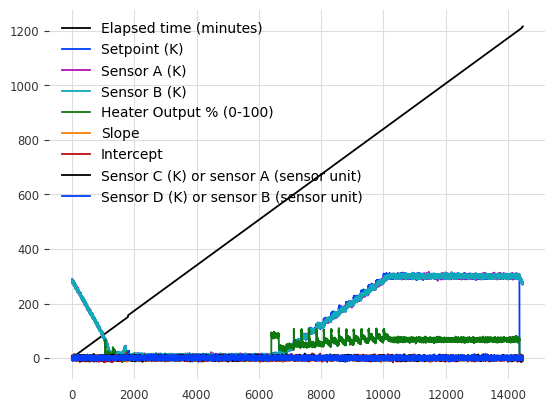

In [123]:
plt.plot(time_series['Elapsed time (minutes)'].pd_series(), label="Elapsed time (minutes)")
plt.plot(time_series['Setpoint (K)'].pd_series(), label="Setpoint (K)")
plt.plot(time_series['Sensor A (K)'].pd_series(), label="Sensor A (K)")
plt.plot(time_series['Sensor B (K)'].pd_series(), label="Sensor B (K)")
plt.plot(time_series['Heater Output % (0-100)'].pd_series(), label="Heater Output % (0-100)")
plt.plot(time_series['Slope'].pd_series(), label="Slope")
plt.plot(time_series['Intercept'].pd_series(), label="Intercept")
plt.plot(time_series['Sensor C (K) or sensor A (sensor unit)'].pd_series(), label="Sensor C (K) or sensor A (sensor unit)")
plt.plot(time_series['Sensor D (K) or sensor B (sensor unit)'].pd_series(), label="Sensor D (K) or sensor B (sensor unit)")

# plt.plot(pred.pd_series(), label= "forecast")
plt.legend()
plt.show()

# Dynamic Time Warping

# Feature Filtering 

In [ ]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('magnetism.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'Magnetism_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Set B field (T)': 'value_3',
                                            'B field (T)': 'value_4', 'Ramp speed (T/min)': 'value_5', 'Voltage (V)': 'value_6',
                                            'Inner Lower Temperature': 'value_7', 'Outer Lower Temperature': 'value_8',
                                            'Inner Upper Temperature': 'value_9', 'Outer Upper Temperature': 'value_10',
                                            '1st Stage Temperature': 'value_11', 'Shield Temperature': 'value_12',
                                            '2nd Stage Temperature': 'value_13'})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')

# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


In [3]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('Data/CCR.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'CCR_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Setpoint (K)': 'value_3',
                                            'Sensor A (K)': 'value_4', 'Sensor B (K)': 'value_5', 'Heater Output % (0-100)': 'value_6',
                                            'Heater Range (integer 0-5)': 'value_7', 'Slope': 'value_8',
                                            'Intercept': 'value_9', 'Sensor C (K) or Sensor A (sensor unit)': 'value_10',
                                            'Sensor D (K) or Sensor B (sensor unit)': 'value_11',})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
print("here")
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')
print('here')
# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


here


Feature Extraction:   0%|          | 0/30 [00:55<?, ?it/s]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Rearrange Column Order

# Savitsky-Golay Filter

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

In [7]:
df

NameError: name 'df' is not defined

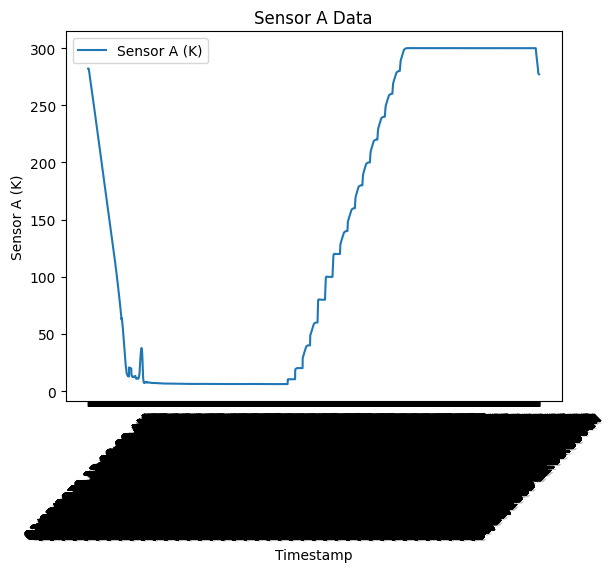

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

timestamps = df['Timestamp']
sensor_a = df['Sensor A (K)']

fig, ax = plt.subplots()
ax.plot(timestamps, sensor_a, label='Sensor A (K)')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Sensor A (K)')
plt.legend()
plt.title('Sensor A Data')

# Display the graph
plt.show()


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

timestamps = df['Timestamp']
sensor_a = df['Sensor A (K)']

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(sensor_a, window_length=20, polyorder=15, mode="nearest")

fig, ax = plt.subplots()
ax.plot(timestamps, y_smooth, label='Smoothed Sensor A (K)')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Sensor A (K)')
plt.legend()
plt.title('Smoothed Sensor A Data')

# Display the graph
plt.show()



KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

fig, ax = plt.subplots(4, figsize=(8, 14))
window_sizes = [100, 200, 300]
i = 0

for w_size in window_sizes:
    y_fit = savgol_filter(sensor_a, w_size, 3, mode="nearest")
    ax[i].plot(timestamps, sensor_a, label="Sensor A (K)", color="green")
    ax[i].plot(timestamps, y_fit, label="Smoothed Sensor A (K)", color="red")
    ax[i].set_title("Window size: " + str(w_size))
    ax[i].legend()
    ax[i].grid(True)
    i += 1

plt.tight_layout()
plt.show()


# Feature Engineering

In [24]:
import pandas as pd